<FONT COLOR="RED" SIZE="6">Embedded Methods</FONT>
<P><FONT COLOR="yELLOW" SIZE="4">4_ElasticNet_Regularization</FONT>

*ElasticNet is a regularization technique that combines L1L1 (Lasso) and L2L2 (Ridge) penalties. It is particularly useful when you have high-dimensional data with multicollinearity (correlated features), as it balances feature selection and regularization.*

*Works well Binary Classfication.

<b>Here’s an alternative approach to implementing ElasticNet Regularization for multiclass classification. Instead of using a one-vs-rest (OvR) strategy, this method uses multinomial logistic regression with ElasticNet regularization, leveraging scikit-learn's LogisticRegression with the saga solver.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b>The saga solver in scikit-learn is a stochastic optimization algorithm designed for large-scale linear classification and regression problems. It supports regularization methods such as L1 (Lasso), L2 (Ridge), and ElasticNet. It is particularly efficient for datasets with many samples and features.

In [3]:
# ElasticNet Regularization with Logistic Regression
logistic_elastic_net = LogisticRegressionCV(
    penalty='elasticnet',
    solver='saga',  # Supports ElasticNet
    l1_ratios=[0.1, 0.5, 0.7, 0.9, 1.0],  # Mix of L1 and L2 regularization
    Cs=10,  # Inverse of regularization strength
    max_iter=5000,
    multi_class='multinomial',  # For multiclass classification
    cv=5,  # Cross-validation folds
    random_state=42
)

In [4]:
# Train the model
logistic_elastic_net.fit(X_train, y_train)

LogisticRegressionCV(cv=5, l1_ratios=[0.1, 0.5, 0.7, 0.9, 1.0], max_iter=5000,
                     multi_class='multinomial', penalty='elasticnet',
                     random_state=42, solver='saga')

In [5]:
# Extract coefficients and selected features
coefficients = logistic_elastic_net.coef_
selected_features = np.any(coefficients != 0, axis=0)  # Features with non-zero coefficients
selected_feature_names = np.array(feature_names)[selected_features]


In [6]:
# Print selected features
print("Selected Features (ElasticNet Multiclass):")
print(selected_feature_names)

Selected Features (ElasticNet Multiclass):
['alcohol' 'malic_acid' 'ash' 'alcalinity_of_ash' 'magnesium'
 'total_phenols' 'flavanoids' 'nonflavanoid_phenols' 'proanthocyanins'
 'color_intensity' 'hue' 'od280/od315_of_diluted_wines' 'proline']


In [7]:
# Evaluate model performance
train_accuracy = logistic_elastic_net.score(X_train, y_train)
test_accuracy = logistic_elastic_net.score(X_test, y_test)
print(f"\nElasticNet Multiclass Accuracy (Train): {train_accuracy:.2f}")
print(f"ElasticNet Multiclass Accuracy (Test): {test_accuracy:.2f}")


ElasticNet Multiclass Accuracy (Train): 1.00
ElasticNet Multiclass Accuracy (Test): 0.98


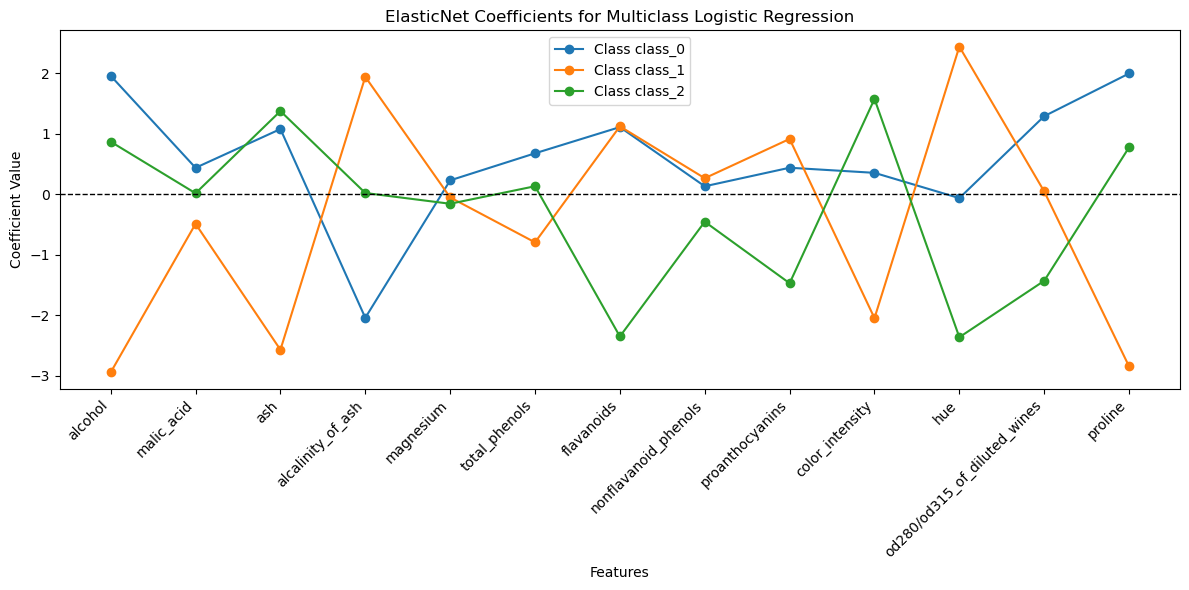

In [8]:
# Plot coefficients for all classes
plt.figure(figsize=(12, 6))
for i, class_label in enumerate(wine.target_names):
    plt.plot(feature_names, coefficients[i], label=f"Class {class_label}", marker="o")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("ElasticNet Coefficients for Multiclass Logistic Regression")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

<b><font color="orange">Advantages of ElasticNet:</font></b>

<li>Combines the strengths of Lasso and Ridge regularization.</li>
    <li>Handles multicollinearity effectively.</li>
    <li>Automatically performs feature selection by shrinking coefficients to zero.</li>

<b><font color="orange">Limitations:</font></b>

<li>Requires tuning of both αα and l1_ratiol1_ratio, increasing computational cost.</li>
   <li> May over-regularize when αα is too high, leading to underfitting.</li>